### Import packages

In [7]:
import torch
from dataset import Dataset
from learn import train, test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setup running device

In [2]:
use_gpu = True
device = "cuda" if use_gpu and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Load dataset

In [9]:
features = [
    'v_enc_dim300',
    'v_freq_freq',
    'v_deg',
    'v_sense',
    'e_vertexsim',
    'e_dir', 'e_rel',
    'e_weightsource',
    'e_srank_rel',
    'e_trank_rel',
    'e_sense'
]

split_frac = 0.8
dataset = Dataset(features, split_frac, device)

loading v_enc_dim300
loading v_freq_freq
loading v_deg
loading v_sense
loading e_vertexsim
loading e_dir
loading e_rel
loading e_weightsource
loading e_srank_rel
loading e_trank_rel
loading e_sense
loading problem plain texts
loading labeled pairs
Config: feature_enc_len:20, path_enc_type:Attention, feature_enc_type:proj+mean, N:1024, n_epoch:300


### Setup training and model configurations

In [18]:
feature_enc_len = 20
feature_enc_type = 'proj+mean'  # 'proj+mean' OR 'concat+proj'
path_enc_type = "LSTM"  # 'RNN' OR 'LSTM' OR 'Attention'

num_epoch = 300
N = 1024  # batch size
num_iter = num_epoch * dataset.train_size//N
print(f"Config: feature_enc_len:{feature_enc_len}, path_enc_type:{path_enc_type}, feature_enc_type:{feature_enc_type}, N:{N}, n_epoch:{num_epoch}")

Config: feature_enc_len:20, path_enc_type:LSTM, feature_enc_type:proj+mean, N:1024, n_epoch:300


### Start training

In [19]:
encoder, predictor, loss = train(dataset, feature_enc_len, num_iter, N, device, path_enc_type, feature_enc_type)

defining architecture
Start training
Progress: 0.00%, loss: 0.7080430388450623, time spent: 0.00 minutes
Progress: 3.47%, loss: 0.6725267767906189, time spent: 0.18 minutes
Progress: 6.94%, loss: 0.6419044733047485, time spent: 0.35 minutes
Progress: 10.42%, loss: 0.6235285401344299, time spent: 0.53 minutes
Progress: 13.89%, loss: 0.6166447401046753, time spent: 0.71 minutes
Progress: 17.36%, loss: 0.6189284920692444, time spent: 0.88 minutes
Progress: 20.83%, loss: 0.6000668406486511, time spent: 1.05 minutes
Progress: 24.31%, loss: 0.6376676559448242, time spent: 1.22 minutes
Progress: 27.78%, loss: 0.5960756540298462, time spent: 1.40 minutes
Progress: 31.25%, loss: 0.6226040720939636, time spent: 1.58 minutes
Progress: 34.72%, loss: 0.6037673354148865, time spent: 1.75 minutes
Progress: 38.19%, loss: 0.6040180921554565, time spent: 1.93 minutes
Progress: 41.67%, loss: 0.6194365620613098, time spent: 2.11 minutes
Progress: 45.14%, loss: 0.6115686893463135, time spent: 2.28 minutes


### Test model

In [20]:
config = [feature_enc_len, feature_enc_type, path_enc_type, N, num_epoch]
test(dataset, encoder, predictor, loss, config)

Start testing
Test accuracy: 0.6762911752745018, recall: 0.676539360872954, precision: 0.6949559647718174, f1: 0.6856240126382305


### Plot training loss VS iteration

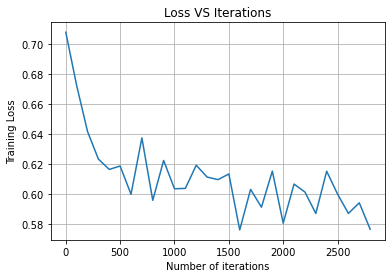

In [21]:
df = pd.read_csv("train.log")
fig, ax = plt.subplots()
ax.plot(df['n_iter'], df['loss'])

ax.set(xlabel='Number of iterations', ylabel='Training Loss',
       title='Loss VS Iterations')
ax.grid()
plt.show()